# This notebook contains the code to reproduce all of the analyses of the manuscript titled "_Blood RNA Signatures Predict Recent Tuberculosis Exposure in Mice, Macaques and Humans_"

Only Ingenuity Pathway Analysis for Figure 5E is excluded (proprietary software)

It is recommended that jupyter extensions are used to all easy display and review of the code:
    - https://github.com/ipython-contrib/jupyter_contrib_nbextensions
    
All code was run with access to a 128 GB RAM machine with 48 CPU cores. This amount of memory and CPU-cores is not necessary for all calculations, but may be necessary to some of the calls to the caret package.
    
All code written during the development of this project is in "Time Since Infection RNA_Paper_Analysis.ipynb" and may be reviewed. However, it is not structured for easy, streamlined running of all code.

There are very small differences in p-values between Figure 2A,B herein compared to the original analysis reported in the paper, likely due to unseeded randomness somewhere in processing. The difference is too small to be important (conclusions are unchanged). __I have ascertained that initially I did not actually set a seed before random hyperparameter search on the training sets.__ The ultimate results are insensitive to these random parameter settings.

# I should consider showing the results with the hyperparameter values I originally obtained (and put in the paper)

## The following code shows the software packages installed in the environment used to produce the analyses of the paper. In each section of the analysis, code is provided for installing needed dependencies

### R environment (R 3.4.3)

In [2]:
ipacks = installed.packages()
ipacks

# To access a specific package's version info:
ipacks["pROC",]

,Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,MD5sum,NeedsCompilation,Built
acepack,acepack,/master/rault/anaconda3/envs/TB/lib/R/library,1.4.1,NA,NA,NA,NA,testthat,NA,MIT + file LICENSE,NA,NA,NA,NA,yes,3.4.3
akima,akima,/master/rault/anaconda3/envs/TB/lib/R/library,0.6-2,NA,R (>= 2.0.0),sp,NA,NA,NA,ACM | file LICENSE,NA,yes,NA,NA,yes,3.4.3
annotate,annotate,/master/rault/anaconda3/envs/TB/lib/R/library,1.56.2,NA,"R (>= 2.10), AnnotationDbi (>= 1.27.5), XML","Biobase, DBI, xtable, graphics, utils, stats, methods, BiocGenerics (>= 0.13.8), RCurl",NA,"hgu95av2.db, genefilter, Biostrings (>= 2.25.10), IRanges, rae230a.db, rae230aprobe, tkWidgets, GO.db, org.Hs.eg.db, org.Mm.eg.db, hom.Hs.inp.db, humanCHRLOC, Rgraphviz, RUnit,",NA,Artistic-2.0,NA,NA,NA,NA,no,3.4.3
AnnotationDbi,AnnotationDbi,/master/rault/anaconda3/envs/TB/lib/R/library,1.40.0,NA,"R (>= 2.7.0), methods, utils, stats4, BiocGenerics (>= 0.23.1), Biobase (>= 1.17.0), IRanges","methods, utils, DBI, RSQLite, stats4, BiocGenerics, Biobase, S4Vectors (>= 0.9.25), IRanges",NA,"DBI (>= 0.2-4), RSQLite (>= 0.6-4), hgu95av2.db, GO.db, org.Sc.sgd.db, org.At.tair.db, KEGG.db, RUnit, TxDb.Hsapiens.UCSC.hg19.knownGene, hom.Hs.inp.db, org.Hs.eg.db, reactome.db, AnnotationForge, graph, EnsDb.Hsapiens.v75, BiocStyle, knitr",NA,Artistic-2.0,NA,NA,NA,NA,no,3.4.3
assertthat,assertthat,/master/rault/anaconda3/envs/TB/lib/R/library,0.2.0,NA,NA,tools,NA,testthat,NA,GPL-3,NA,NA,NA,NA,no,3.4.3
backports,backports,/master/rault/anaconda3/envs/TB/lib/R/library,1.1.2,NA,R (>= 3.0.0),utils,NA,NA,NA,GPL-2,NA,NA,NA,NA,yes,3.4.3
base,base,/master/rault/anaconda3/envs/TB/lib/R/library,3.4.3,base,NA,NA,NA,methods,NA,Part of R 3.4.3,NA,NA,NA,NA,NA,3.4.3
base64,base64,/master/rault/anaconda3/envs/TB/lib/R/library,2.0,NA,NA,openssl,NA,NA,NA,MIT + file LICENSE,NA,NA,NA,NA,no,3.4.3
base64enc,base64enc,/master/rault/anaconda3/envs/TB/lib/R/library,0.1-3,NA,R (>= 2.9.0),NA,NA,NA,png,GPL-2 | GPL-3,NA,NA,NA,NA,yes,3.4.3
BH,BH,/master/rault/anaconda3/envs/TB/lib/R/library,1.65.0-1,NA,NA,NA,NA,NA,NA,BSL-1.0,NA,NA,NA,NA,no,3.4.3


Package 
                                                                  "pROC" 
                                                                 LibPath 
                         "/master/rault/anaconda3/envs/TB/lib/R/library" 
                                                                 Version 
                                                                "1.12.0" 
                                                                Priority 
                                                                      NA 
                                                                 Depends 
                                                           "R (>= 2.14)" 
                                                                 Imports 
                      "plyr, utils, methods, Rcpp (>= 0.11.1), ggplot2," 
                                                               LinkingTo 
                                                                  "Rcpp" 
                                                                Suggests 
"microbenchmark, tcltk, MASS, logcondens, doParallel,\ntestthat, vdiffr" 
                                                                Enhances 
                                                                      NA 
                                                                 License 
                                                            "GPL (>= 3)" 
                                                         License_is_FOSS 
                                                                      NA 
                                                   License_restricts_use 
                                                                      NA 
                                                                 OS_type 
                                                                      NA 
                                                                  MD5sum 
                                                                      NA 
                                                        NeedsCompilation 
                                                                   "yes" 
                                                                   Built 
                                                                 "3.4.3"

In [3]:
print(ipacks)

                      Package                
acepack               "acepack"              
akima                 "akima"                
annotate              "annotate"             
AnnotationDbi         "AnnotationDbi"        
assertthat            "assertthat"           
backports             "backports"            
base                  "base"                 
base64                "base64"               
base64enc             "base64enc"            
BH                    "BH"                   
bindr                 "bindr"                
bindrcpp              "bindrcpp"             
Biobase               "Biobase"              
BiocGenerics          "BiocGenerics"         
BiocInstaller         "BiocInstaller"        
BiocParallel          "BiocParallel"         
biomaRt               "biomaRt"              
bit                   "bit"                  
bit64                 "bit64"                
bitops                "bitops"               
blob                  "blob"      

### Conda environment (for both python and R packages)
 - Most of the python packages are not needed for this paper's analyses
 - The conda environment (including both python and R packages) is described in the env_list.txt and environment.yml files

## Figure 2 Macaque Analysis

- This code reproduces the analysis of Figure 2, showing that "Blood genome-wide RNA expression discriminates early vs. late M.tb infection time periods in cynomolgus macaques"

### Install and Load Required Libraries

In [87]:
source("https://bioconductor.org/biocLite.R")
if (!require("Biobase")) {
  biocLite("Biobase")
  library("Biobase")
}
if (!require("GEOquery")) {
  biocLite("GEOquery")
  library("GEOquery")
}

if (!require("sva")) {
  biocLite("sva")
  library("sva")
}

if (!require("ranger")) {
  install.packages("ranger")
  library("ranger")
}

if (!require("ggplot2")) {
  install.packages("ggplot2")
  library("ggplot2")
}

if (!require("glmnet")) {
  install.packages("glmnet")
  library("glmnet")
}

if (!require("gbm")) {
  install.packages("gbm")
  library("gbm")
}

if (!require("kernlab")) {
  install.packages("kernlab")
  library("kernlab")
}

if (!require("caret")) {
  install.packages("caret")
  library("caret")
}
if (!require("dplyr")) {
  install.packages("dplyr")
  library("dplyr")
}

if (!require("ggsignif")) {
  install.packages("ggsignif")
  library("ggsignif")
}

if (!require("doParallel")) {
  install.packages("doParallel")
  library("doParallel")
}

if (!require("cowplot")) {
  install.packages("cowplot")
  library("cowplot")
}

if (!require("pROC")) {
    # pROC 1.12.0 is required, and may not be the default installation:
    packageUrl<- "https://cran.r-project.org/src/contrib/Archive/pROC/pROC_1.12.0.tar.gz"
    install.packages(packageUrl, repos=NULL, type='source')
    library("pROC")
}

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
Loading required package: gbm
Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:boot’:

    aml

The following object is masked from ‘package:caret’:

    cluster

Loading required package: splines
Loaded gbm 2.1.3
Loading required package: kernlab

Attaching package: ‘kernlab’

The following object is masked from ‘package:CircStats’:

    rvm

The following object is masked from ‘package:ggplot2’:

    alpha

Loading required package: ggsignif


### Load the data, after running the "download_macaque_human_data.sh" script with the repository.

In [80]:
source("utils_submission.R")

In [16]:
path  = "/master/rault/TB"    # Change this path as needed
monkey.path = paste(path, "/data/GSE84152", sep="")

In [ ]:
monkey.gset = getGEO(filename=paste(monkey.path, "GSE84152_series_matrix.txt", sep="/"), 
             destdir=monkey.path)

In [22]:
monkey.gset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 47323 features, 470 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM2227793 GSM2227794 ... GSM2228262 (470 total)
  varLabels: title geo_accession ... wbc:ch1 (95 total)
  varMetadata: labelDescription
featureData
  featureNames: ILMN_1343291 ILMN_1343295 ... ILMN_3311190 (47323
    total)
  fvarLabels: ID Species ... GB_ACC (30 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
Annotation: GPL10558 

In [23]:
raw.expres = read.table(file = paste(monkey.path, "GSE84152_non-normalized.txt", sep="/"), header=T , sep="\t")

#### Process the phenotype table, filter probes expressed in at least 5% of samples (Detection Pvalue < 0.01)

In [26]:
pheno = filter.monkey.pheno(pData(monkey.gset))

              title ChIP hyb.chamber  dataset synchroset monkeyid time.point
GSM2227793  M16_150    1           1 Training         No      M16        150
GSM2227794    M17_3    1           1 Training         No      M17          3
GSM2227795  M8_Pre2    1           1 Training         No       M8          1
GSM2227796   M19_56    1           1 Training         No      M19         56
GSM2227797   M19_90    1           1 Training         No      M19         90
GSM2227798     M1_7    1           1 Training         No       M1          7
GSM2227799   M18_20    1           1 Training         No      M18         20
GSM2227800   M15_90    1           1 Training         No      M15         90
GSM2227801    M1_42    1           1 Training         No       M1         42
GSM2227802  M13_180    1           1 Training        Yes      M13        180
GSM2227803   M17_10    1           1 Training         No      M17         10
GSM2227804   M18_10    1           1 Training         No      M18         10

In [28]:
PAL.5 = get.monkey.expressed.genes(raw.expres)

[1] "Genes expressed in at least 5 % of samples: 15083"


In [35]:
expres = process.monkey.exprs(exprs(monkey.gset), PAL.5)

### Batch correct expression data by hybridization chamber and dataset as in Gideon et al. 2016

Found2batches
Adjusting for0covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data

Found12batches
Adjusting for0covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



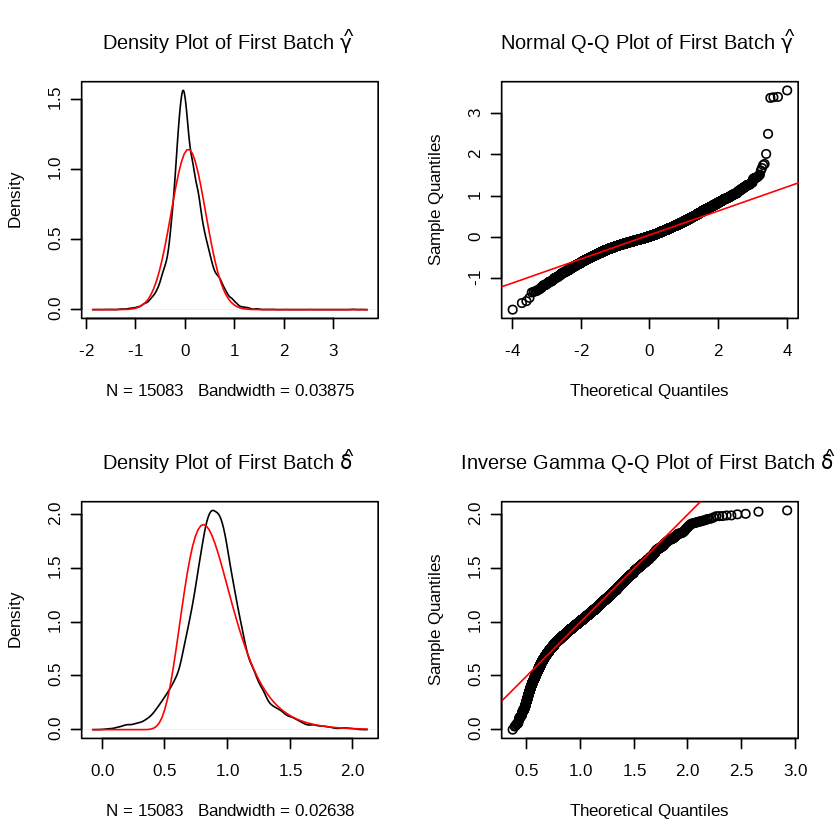

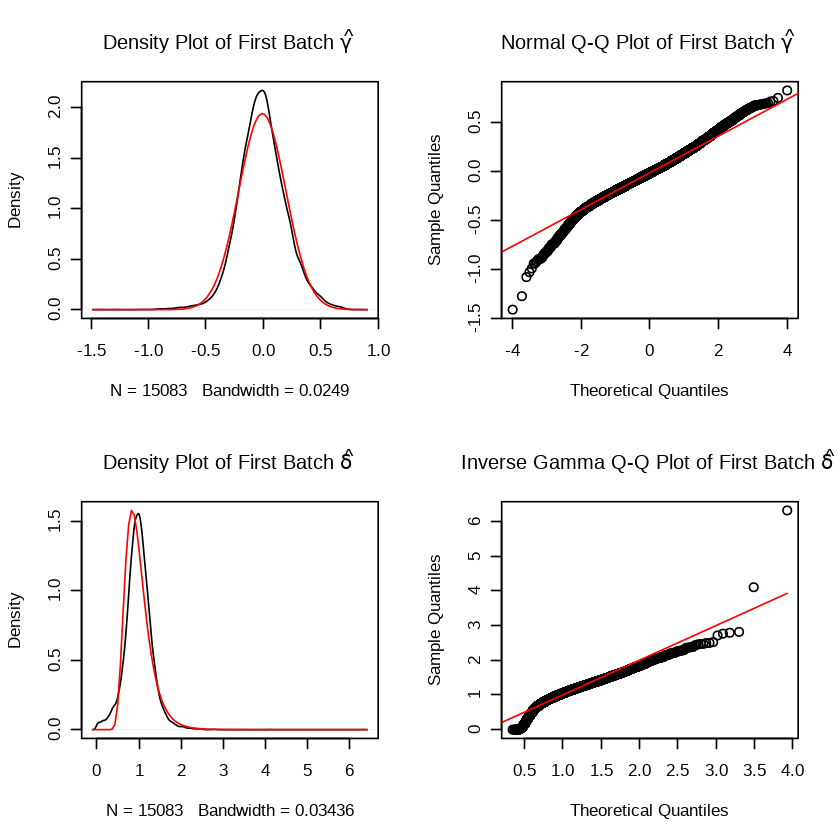

In [39]:
modcombat<-model.matrix(~1, data=pheno)
combat_dataset= ComBat(dat=expres, batch=pheno$dataset, mod=modcombat, par.prior=TRUE, prior.plots=TRUE)
expres = ComBat(dat=combat_dataset, batch=pheno$hyb.chamber, mod=modcombat, par.prior=TRUE, prior.plots=TRUE)
  


### Statistically Filter the genes by 60% most variable genes

In [40]:
cut = 0.6

filter = function(x) {IQR(x) / median(x)}
genes.range = apply(expres, 1, filter)
criteria = quantile(genes.range, c(1-cut))

genes.f = rownames(expres)[genes.range > criteria]
expres = expres[genes.f,]

### Focus on time points 20 - 180 days, and store a copy of the pheno table

In [46]:
expres = expres[, pheno$time.point > 10]
pheno = pheno[pheno$time.point > 10,]

In [51]:
pheno$time.period = as.factor(ifelse(pheno$time.point >= 90,
                                             "late",
                                             "early"))

In [53]:
write.table(pheno, file = paste(monkey.path, "PhenoData_processed.txt", sep="/"),sep="\t")

In [55]:
pheno = read.table(file = paste(monkey.path, "PhenoData_processed.txt", sep="/"),sep="\t")

In [57]:
pheno

,title,ChIP,hyb.chamber,dataset,synchroset,monkeyid,time.point,infection.time,clinical.status,description,description.1,time.point.comb,time.period
GSM2227793,M16_150,1,1,Training,No,M16,150,M5,Active,M16_150,6303256020_A.AVG_Signal,150,late
GSM2227796,M19_56,1,1,Training,No,M19,56,D56,Active,M19_56,6303256020_D.AVG_Signal,56,early
GSM2227797,M19_90,1,1,Training,No,M19,90,M3,Active,M19_90,6303256020_E.AVG_Signal,90,late
GSM2227799,M18_20,1,1,Training,No,M18,20,D20,Active,M18_20,6303256020_G.AVG_Signal,20,early
GSM2227800,M15_90,1,1,Training,No,M15,90,M3,Latent,M15_90,6303256020_H.AVG_Signal,90,late
GSM2227801,M1_42,1,1,Training,No,M1,42,D42,Active,M1_42,6303256020_I.AVG_Signal,42,early
GSM2227802,M13_180,1,1,Training,Yes,M13,180,M6,Latent,M13_180,6303256020_J.AVG_Signal,180,late
GSM2227805,M6_120,2,1,Training,No,M6,120,M4,Active,M6_120,6303256032_A.AVG_Signal,120,late
GSM2227806,M14_90,2,1,Training,No,M14,90,M3,Latent,M14_90,6303256032_B.AVG_Signal,90,late
GSM2227807,M15_20,2,1,Training,No,M15,20,D20,Latent,M15_20,6303256032_C.AVG_Signal,20,early


### Divide the data into a training and test set (70-30 split), with preserved ratio of monkeys with latent or active tuberculosis.

- This split was performed in python, which is located Macaque_analysis_train_test_set_split.ipynb

In [58]:
test.latent.monkeys = c('M13', 'M27', 'M34', 'M15', 'M35', 'M36')
test.active.monkeys = c('M1', 'M16', 'M32', 'M18', 'M23')

In [68]:
test.rows = rownames(pheno[pheno$monkeyid %in% union(test.latent.monkeys, test.active.monkeys),])
train.rows = setdiff(rownames(pheno), test.rows)

if (dim(expres)[1] > dim(expres)[2])
    expres = t(expres)

pheno.train = droplevels(pheno[train.rows,])
pheno.test = droplevels(pheno[test.rows,])
expres.train = expres[train.rows,]
expres.test = expres[test.rows,]

### Create grouped k-folds according to monkey within the training set. With random seed set to 100, this gives 9-folds

In [72]:
set.seed(100)
folds = groupKFold(pheno.train$monkeyid, k=10)
for (fold in lapply(folds, function(x) {pheno.train$monkeyid[x]}))
    print(length((as.character(fold))))

lapply(folds, function(x, y) table(y[x]), y = pheno.train$monkeyid)

[1] 202
[1] 194
[1] 186
[1] 174
[1] 187
[1] 179
[1] 186
[1] 178
[1] 194


$Fold1

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  5   8   8   0   8   7   8   8   8   8   8   8   8   8   8   8   8   7   8   8 
M38  M4  M5  M6  M7  M8  M9 
  7   8   8   8   8   8   8 

$Fold2

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  5   8   8   8   8   7   8   8   8   0   8   8   8   8   8   8   8   7   8   8 
M38  M4  M5  M6  M7  M8  M9 
  7   8   8   8   8   0   8 

$Fold3

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  5   0   8   8   8   7   8   8   8   8   8   8   0   8   8   8   0   7   8   8 
M38  M4  M5  M6  M7  M8  M9 
  7   8   8   8   8   8   8 

$Fold4

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  0   8   8   8   8   7   8   0   8   8   8   8   8   0   8   8   8   0   0   8 
M38  M4  M5  M6  M7  M8  M9 
  7   8   8   8   8   8   8 

$Fold5

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 

### Reproduce Supplementary Figure S2 (redo this calculation when I have a break so that it can go to completion to recreate the figure

In [ ]:
seed=7

# Now we are going to loop over different models

start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("gbm", "svmRadial", "svmPoly", "ranger", "glmnet")

models = list()


#folds
control <- trainControl(method="cv", index=folds, search="random", allowParallel=TRUE, savePredictions='final',
                       classProbs=TRUE, summaryFunction=twoClassSummary)

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(expres.train, pheno.train$time.period,  method=alg, tuneLength=50, trControl=control,
                 metric="ROC")
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

In [ ]:
results = resamples(models)
bwplot(results)

### Reproduce Figure 2A,B, using glmnet. Do a larger hyperparameter search to find the optimally performing model on the training set.

In [76]:

set.seed(100)

n = 10000
lambda.grid = c(10 ^ runif(n, min = log10(1e-5), max = log10(1e2)))
alpha.grid = runif(length(lambda.grid), min = 0.00, 1.0)

train.grid = data.frame(lambda = sample(lambda.grid, length(lambda.grid)),
                       alpha = sample(alpha.grid, length(lambda.grid)))


In [77]:
seed=7


start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c( "glmnet")

models = list()


#folds
control <- trainControl(method="cv", index=folds, allowParallel=TRUE, savePredictions='final',
                       classProbs=TRUE, summaryFunction=twoClassSummary)

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(expres.train, pheno.train$time.period,  method=alg, trControl=control, tuneGrid=train.grid,
                 metric="ROC")
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "I have gotten to model:"
[1] "glmnet"
Time difference of 2.033721 hours


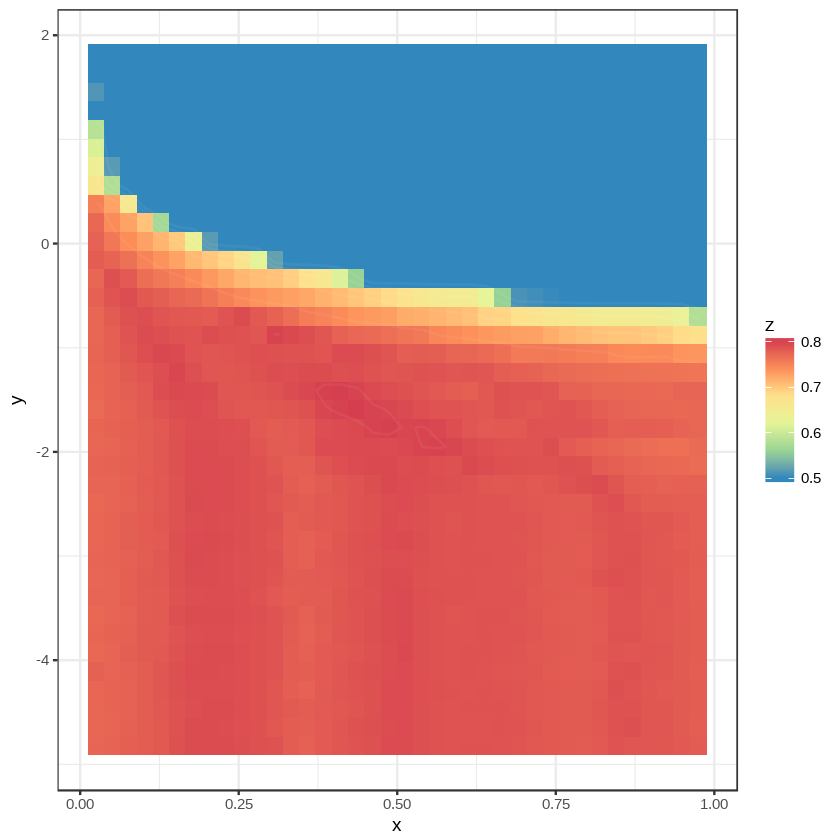

In [81]:
glmres = models$glmnet$results
graph.hyper(glmres$alpha, log10(glmres$lambda), glmres$ROC)


#### Figure 2A

[1] "This is the AUC:"
Area under the curve: 0.7835
[1] "This is the AUC p-value:"
[1] 6.39348e-13
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.7222-0.8448 (DeLong)
[1] "This is the AUC:"
Area under the curve: 0.808
[1] "This is the AUC p-value:"
[1] 2.039996e-07
[1] "This is the AUC 95% Confidence Interval"
95% CI: 0.7122-0.9037 (DeLong)


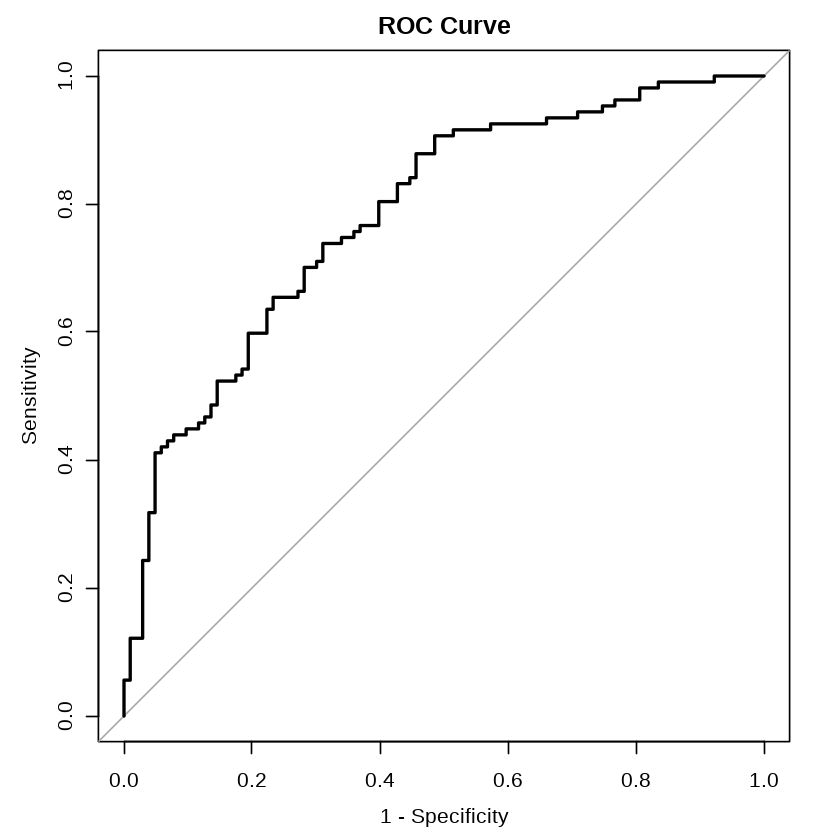

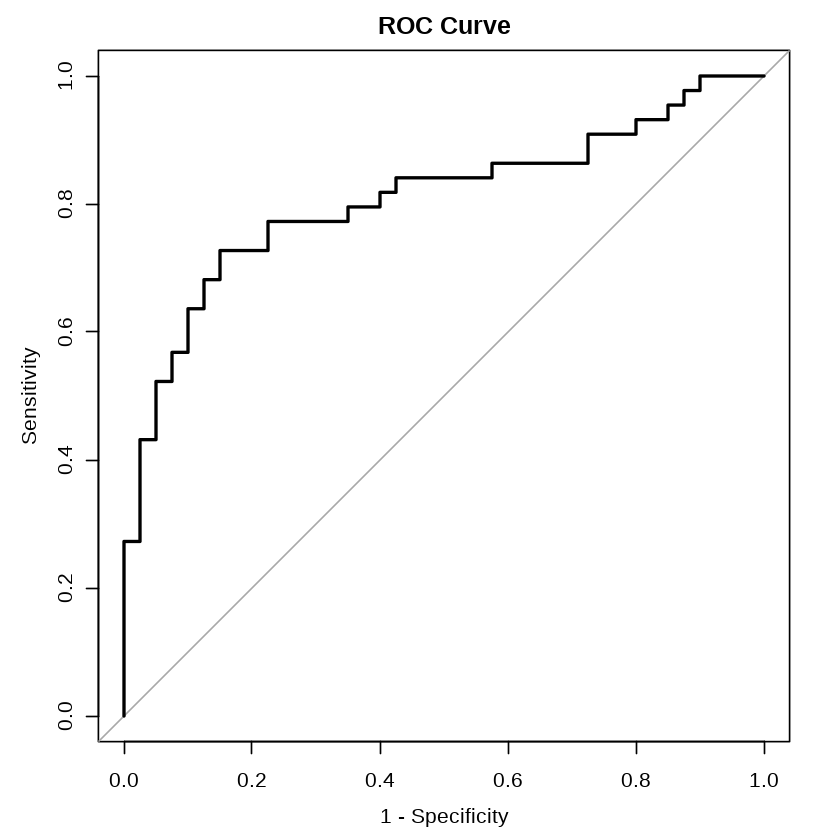

In [83]:
models.monkey.ROC = models
model.monkey.ROC = models.monkey.ROC$glmnet

glmnet.monkey.val.ROC = my.roc(model.monkey.ROC$pred$early, model.monkey.ROC$pred$obs, "early")

pred.monkey.test = predict(model.monkey.ROC, newdata = expres.test, type="prob")
glmnet.monkey.ROC = my.roc(pred.monkey.test$early,
                          pheno.test$time.period,
                          "early")

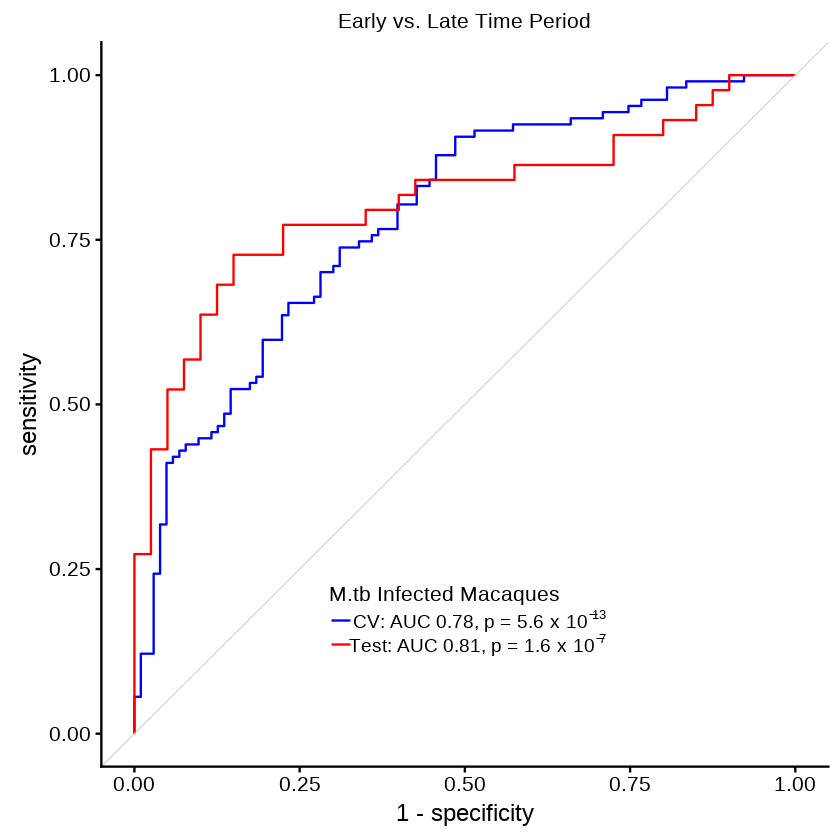

In [84]:
monkey.class.plot = ggroc(list(CV=glmnet.monkey.val.ROC, test=glmnet.monkey.ROC), legacy.axes=TRUE) +
                geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.25) + 
                ggtitle("Early vs. Late Time Period") + theme(plot.title = element_text(size=12, face="plain")) +
                scale_color_manual(name="M.tb Infected Macaques",
                                  labels=c("CV" =expression("CV: AUC 0.78, p ="~5.6~ "x" ~10^{-13} ~ " "),
                                           "test"=expression("Test: AUC 0.81, p ="~1.6~ "x" ~10^{-7} ~ " ")),
                                   #expression("Average Conc of S- on plates" ~
                          #(mu ~ moles ~ cm^{-2} ~ "dry wt")),
                                  values=c("CV"="blue", "test"="red")) +
            theme(legend.position=c(0.30,0.20), legend.title = element_text(size=12), legend.text = element_text(size=11)) 
monkey.class.plot

#### Figure 2B

In [88]:
monkey.val.preds = models.monkey.ROC$glmnet$pred
pred.monkey.test  = predict(models.monkey.ROC$glmnet, newdata=expres.test)

# Calculate ratio of active to latent in all actual and predicted early and late time periods, in both validation and test set

a.l.early.val = sum(dplyr::filter(pheno.train, time.period=="early")$clinical.status == "Active") / length(dplyr::filter(pheno.train, time.period=="early")$clinical.status)
a.l.late.val = sum(dplyr::filter(pheno.train, time.period=="late")$clinical.status == "Active") / length(dplyr::filter(pheno.train, time.period=="late")$clinical.status)

a.l.p.early.val = sum(pheno.train[monkey.val.preds$pred == "early",]$clinical.status=="Active") / length(pheno.train[monkey.val.preds$pred == "early",]$clinical.status)
a.l.p.late.val = sum(pheno.train[monkey.val.preds$pred == "late",]$clinical.status=="Active") / length(pheno.train[monkey.val.preds$pred == "late",]$clinical.status)


# Calculate ratio of active to latent in all actual and predicted early and late time periods, in both validation and test set
a.l.early.test = sum(dplyr::filter(pheno.test, time.period=="early")$clinical.status == "Active") / length(dplyr::filter(pheno.test, time.period=="early")$clinical.status)
a.l.late.test = sum(dplyr::filter(pheno.test, time.period=="late")$clinical.status == "Active") / length(dplyr::filter(pheno.test, time.period=="late")$clinical.status)

a.l.p.early.test = sum(pheno.test[pred.monkey.test  == "early",]$clinical.status=="Active") / length(pheno.test[pred.monkey.test  == "early",]$clinical.status)
a.l.p.late.test = sum(pheno.test[pred.monkey.test  == "late",]$clinical.status=="Active") / length(pheno.test[pred.monkey.test  == "late",]$clinical.status)


t.period = c("Early", "Predicted Early", "Early", "Predicted Early")
partition = as.factor(c("Cross-Validation", "Cross-Validation", "Test", "Test"))
active_prop = c(a.l.early.val, a.l.p.early.val, a.l.early.test, a.l.p.early.test)
partition = factor(partition, levels(partition)[c(which(levels(partition) == "Cross-Validation"),
                                                  which(levels(partition) == "Test"))])

disease.confound = data.frame(t.period=as.factor(t.period), partition=partition, active_prop=active_prop)


n.act.early.val = sum(dplyr::filter(pheno.train, time.period=="early")$clinical.status == "Active")
n.tot.early.val = length(dplyr::filter(pheno.train, time.period=="early")$clinical.status)

n.act.p.early.val = sum(pheno.train[monkey.val.preds$pred == "early",]$clinical.status=="Active")
n.tot.p.early.val = length(pheno.train[monkey.val.preds$pred == "early",]$clinical.status)


fisher.test(matrix(c(n.act.early.val, 
                     n.tot.early.val - n.act.early.val,
                     n.act.p.early.val,
                     n.tot.p.early.val - n.act.p.early.val), ncol=2))


n.act.early.test = sum(dplyr::filter(pheno.test, time.period=="early")$clinical.status == "Active")
n.tot.early.test = length(dplyr::filter(pheno.test, time.period=="early")$clinical.status)

n.act.p.early.test = sum(pheno.test[pred.monkey.test  == "early",]$clinical.status=="Active")
n.tot.p.early.test = length(pheno.test[pred.monkey.test  == "early",]$clinical.status)


fisher.test(matrix(c(n.act.early.test, 
                     n.tot.early.test - n.act.early.test,
                     n.act.p.early.test,
                     n.tot.p.early.test - n.act.p.early.test), ncol=2))


	Fisher's Exact Test for Count Data

data:  
p-value = 0.8893
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.5304016 1.7128232
sample estimates:
odds ratio 
 0.9533132 



	Fisher's Exact Test for Count Data

data:  
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4008563 2.3838605
sample estimates:
odds ratio 
 0.9784834 


In [92]:
a.l.plot = ggplot(disease.confound, aes(x=t.period, y=active_prop)) + geom_bar(stat="identity") + facet_grid(~partition) +
    labs(#x="Time Period Post Infection",
        y="Proportion of Samples from\nMacaques with Active TB") +
ggtitle("Risk of TB", subtitle="Stratified by Predicted Time Period") + theme(plot.title = element_text(size=12, face="plain", hjust=0.5), 
                                                                              plot.subtitle=element_text(size=11, face="plain", hjust=0.5)) +
ylim(0, 1.0) +
geom_signif(comparisons=list(c("Early", "Predicted Early")),
                               y_position=c(0.75),
              annotations = c("1.0"), vjust=-0.5,#step_increase = 4.3, #vjust = 0.4, tip_length = 0.015, textsize=3.5) 
             tip_length=0) + theme(panel.background = element_rect(fill = "white", colour = "white", size = 4)) +
                scale_x_discrete(labels=c("Early" = "Early", "Predicted Early"="Predicted\nEarly")) +
theme(axis.title.x=element_blank())

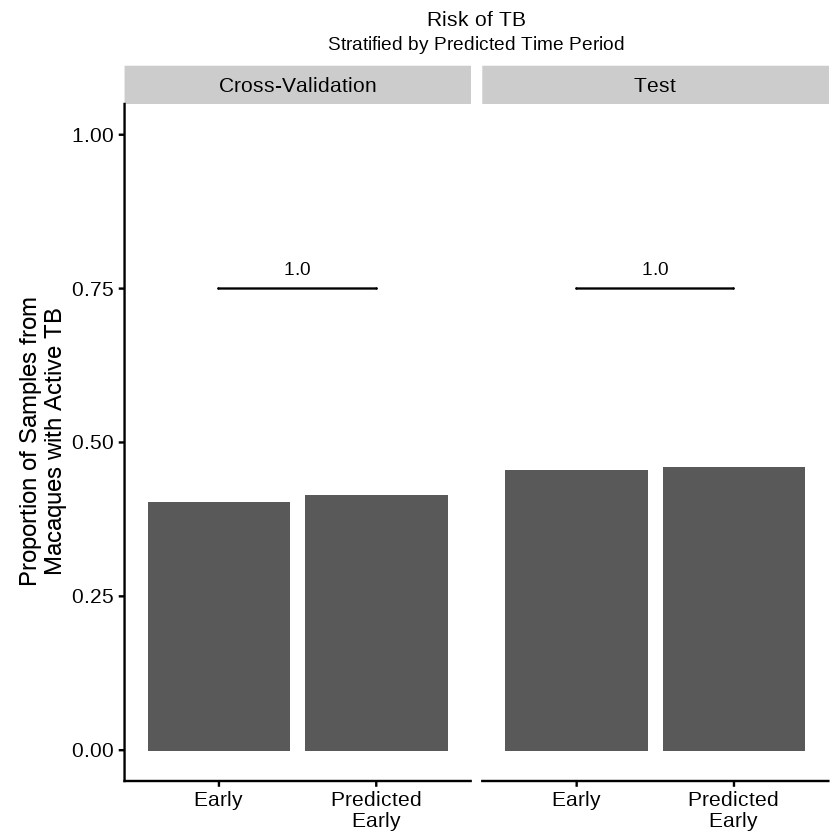

In [93]:
a.l.plot

### Reproduce Figure 2C-F, using glmnet for regression. Do a hyperparameter search to find the optimally performing model on the training set.

In [ ]:
source("utils.R")
load("data/analysis_results/Monkey-titan-TB-caret-middlelate-classification-glmnet grid tuning with 10000 samples_findingbestAUC_round2-2018-09-06-.RData")
models.monkey.ROC = models

load("data/analysis_results/Monkey-TB-caret-middlelate-regression-glmnet grid tuning with 1000 samples_looking everywhere_alltimepoints_round2-2018-05-29-.RData")
regress.model = models

load("data//analysis_results//Monkey-TB-caret-middlelate-regression-glmnet grid tuning with 1000 samples_looking everywhere_first90days_round1-2018-05-29-.RData")
regress.90.model = models

In [94]:
set.seed(100)

n = 1000
lambda.grid = c(10 ^ runif(n, min = log10(1e0), max = log10(1e2)))

alpha.grid = runif(length(lambda.grid), min = 0.00, 1.00)

train.grid = data.frame(lambda = sample(lambda.grid, length(lambda.grid)),
                       alpha = sample(alpha.grid, length(lambda.grid)))


In [95]:
seed=7

library(doParallel)

start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("glmnet")


models = list()


#folds
control <- trainControl(method="cv", index=folds, savePredictions = 'final', allowParallel=TRUE)

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(expres.train, pheno.train$time.point, tuneGrid = train.grid, method=alg, trControl=control) # 
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "I have gotten to model:"
[1] "glmnet"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Time difference of 11.28674 mins


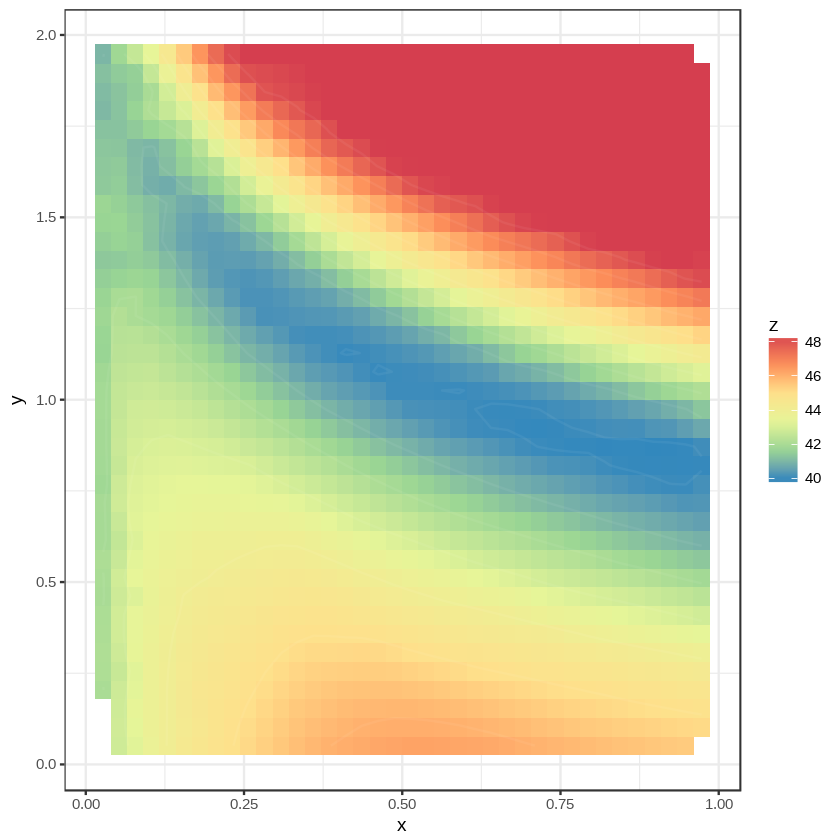

In [96]:
glmres = models$glmnet$results
graph.hyper(glmres$alpha, log10(glmres$lambda), glmres$MAE)


In [97]:
regress.model = models

In [99]:
val.regress.model = regress.model
val.pred = val.regress.model$glmnet$pred
all.metrics(val.pred$obs, val.pred$pred)

regress.model.glm = regress.model$glmnet
pred.regress.test = predict(regress.model.glm, newdata = expres.test)
time.point.obs = pheno.test$time.point

all.metrics(time.point.obs, pred.regress.test)

[1] "Root Mean Squared Error (RMSE)"
[1] 47.86508
[1] "Mean Absolute Error"
[1] 39.73711
[1] "Median Absolute Error"
[1] 37.99128
[1] "Pearson Correlation Coefficient"
[1] 0.4826416
[1] "Pearson Correlation Signifcance Test"

	Pearson's product-moment correlation

data:  truth and pred
t = 7.9477, df = 208, p-value = 1.187e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3715288 0.5801238
sample estimates:
      cor 
0.4826416 

[1] "Spearman Correlation Signifcance Test"


Warning message in cor.test.default(truth, pred, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  truth and pred
S = 734230, p-value = 3.161e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5242953 

[1] "R squared"
[1] 0.2329429
[1] "Root Mean Squared Error (RMSE)"
[1] 45.5731
[1] "Mean Absolute Error"
[1] 38.65272
[1] "Median Absolute Error"
[1] 35.31099
[1] "Pearson Correlation Coefficient"
[1] 0.538675
[1] "Pearson Correlation Signifcance Test"

	Pearson's product-moment correlation

data:  truth and pred
t = 5.7897, df = 82, p-value = 1.253e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3666206 0.6751030
sample estimates:
     cor 
0.538675 

[1] "Spearman Correlation Signifcance Test"


Warning message in cor.test.default(truth, pred, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  truth and pred
S = 39168, p-value = 1.237e-09
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6034374 

[1] "R squared"
[1] 0.2901708


In [100]:
expres.train.90 = expres.train[pheno.train$time.point <= 90,]
pheno.train.90 = pheno.train[pheno.train$time.point <= 90,]

In [106]:
set.seed(100)
pheno.train.90 = dplyr::filter(pheno.train, time.point<=90)
folds.90 = groupKFold(pheno.train.90$monkeyid, k=10)
for (fold in lapply(folds.90, function(x) {pheno.train.90$monkeyid[x]}))
    print(length((as.character(fold))))

lapply(folds.90, function(x, y) table(y[x]), y = pheno.train.90$monkeyid)

[1] 129
[1] 124
[1] 119
[1] 110
[1] 119
[1] 114
[1] 119
[1] 114
[1] 124


$Fold1

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  5   5   5   0   5   5   5   5   5   5   5   5   5   5   5   5   5   4   5   5 
M38  M4  M5  M6  M7  M8  M9 
  5   5   5   5   5   5   5 

$Fold2

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  5   5   5   5   5   5   5   5   5   0   5   5   5   5   5   5   5   4   5   5 
M38  M4  M5  M6  M7  M8  M9 
  5   5   5   5   5   0   5 

$Fold3

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  5   0   5   5   5   5   5   5   5   5   5   5   0   5   5   5   0   4   5   5 
M38  M4  M5  M6  M7  M8  M9 
  5   5   5   5   5   5   5 

$Fold4

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 M37 
  0   5   5   5   5   5   5   0   5   5   5   5   5   0   5   5   5   0   0   5 
M38  M4  M5  M6  M7  M8  M9 
  5   5   5   5   5   5   5 

$Fold5

M10 M11 M12 M14 M17 M19  M2 M20 M21 M22 M24 M25 M26 M28 M29  M3 M30 M31 M33 

In [101]:
set.seed(100)

n = 1000
lambda.grid = c(10 ^ runif(n, min = log10(1e-12), max = log10(1e4)))

alpha.grid = runif(length(lambda.grid), min = 0.00, 1.00)

train.grid = data.frame(lambda = sample(lambda.grid, length(lambda.grid)),
                       alpha = sample(alpha.grid, length(lambda.grid)))


In [ ]:
seed=7

library(doParallel)

start_time <- Sys.time()

cluster = makeCluster(detectCores()-3) # Leaving 3 for other jobs
registerDoParallel(cluster)

methods = c("glmnet")


models = list()


#folds
control <- trainControl(method="cv", index=folds.90, savePredictions = 'final', allowParallel=TRUE)

for (alg in methods) {
    set.seed(seed)
    print("I have gotten to model:")
    print(alg)
    model = train(expres.train.90, pheno.train.90$time.point, tuneGrid = train.grid, method=alg, trControl=control) # 
    models[[alg]] = model
}

stopCluster(cluster)
registerDoSEQ()

end_time <- Sys.time()
print(end_time - start_time)

[1] "I have gotten to model:"
[1] "glmnet"


In [ ]:
glmres = models$glmnet$results
graph.hyper(glmres$alpha, log10(glmres$lambda), glmres$MAE)


In [ ]:
regress.90.model.90 = models
val.pred.90 = regress.90.model.90$glmnet$pred
all.metrics(val.pred.90$obs, val.pred.90$pred)

regress.model.90.glm = regress.90.model$glmnet
pred.regress.test.90 = predict(regress.model.90.glm, newdata = expres.test[pheno.test$time.point <= 90,])
time.point.90 = dplyr::filter(pheno.test, time.point <= 90)$time.point
all.metrics(time.point.90, pred.regress.test.90)

#### Plot Figures 4C-F

In [ ]:
test.model = data.frame(obs=pheno.test$time.point, pred=pred.regress.test)

test.model.90 = data.frame(obs=time.point.90, pred=pred.regress.test.90)

In [ ]:
glm.graph.val = generate.regres.graph(val.pred, "Regression on Time Post Infection\n(Cross-Validation)")
glm.graph.test = generate.regres.graph(test.model, "Regression on Time Post Infection\n(Test)")

glm.graph.val.90 = generate.regres.graph(val.pred.90, "Regression on Time Post Infection\n(Cross-Validation, first 90 days)", break.90=T)
glm.graph.test.90 = generate.regres.graph(test.model.90, "Regression on Time Post Infection\n(Test, first 90 days)", break.90=T)


allregressions= plot_grid(glm.graph.val,
                          glm.graph.test,
                          glm.graph.val.90,
                          glm.graph.test.90,
                          labels = toupper(c(letters[1:4], align="h")))

allregressions
